## Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Import Dataset
data = pd.read_csv("student_depression_dataset.csv")

data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


## Data Cleaning

In [10]:
# Rename Columns
data = data.rename(columns={'CGPA':'Cumulative GPA'})
data = data.rename(columns={'Have you ever had suicidal thoughts ?' : 'Suicidal thoughts'})
data = data.rename(columns={'Family History of Mental Illness': 'Mental Illness History'})

In [11]:
# Clean column names
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('?', '').str.replace('/', '_')

In [12]:
# Clean columns value text

#removing blank spaces
data.columns=data.columns.str.replace(' ', '_')
data.replace(' ','_', regex=True, inplace=True)
#removing '' from the sleep duaration output
data['Sleep_Duration'] = data['Sleep_Duration'].str.replace("'", "", regex=False)
data.head()

,id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,Cumulative_GPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Suicidal_thoughts,Work_Study_Hours,Financial_Stress,Mental_Illness_History,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6_hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6_hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less_than_5_hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8_hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6_hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [13]:
# Drop columns too granular
data = data.drop(columns=['id', 'City'], errors='ignore')


In [14]:
# Assign Columns to feature and target variables
X = data.drop('Depression', axis = 1).copy() # Features
y = data['Depression'].copy() # Target

In [15]:
#one hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

,Age,Academic_Pressure,Work_Pressure,Cumulative_GPA,Study_Satisfaction,Job_Satisfaction,Work_Study_Hours,Gender_Male,Profession_'Content_Writer',Profession_'Digital_Marketer',...,Degree_MSc,Degree_Others,Degree_PhD,Suicidal_thoughts_Yes,Financial_Stress_2.0,Financial_Stress_3.0,Financial_Stress_4.0,Financial_Stress_5.0,Financial_Stress_?,Mental_Illness_History_Yes
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1,24.0,2.0,0.0,5.90,5.0,0.0,3.0,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,31.0,3.0,0.0,7.03,5.0,0.0,9.0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,False,False,False,...,False,False,False,True,False,False,False,True,False,True
4,25.0,4.0,0.0,8.13,3.0,0.0,1.0,False,False,False,...,False,False,False,True,False,False,False,False,False,False


## Prep Data for Modeling

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 99)

## Model 1: Bagging Classifier

In [17]:
# Bagging Classifier with Decision Tree estimator
bagging = BaggingClassifier(
    estimator = DecisionTreeClassifier(max_depth=6),
    n_estimators = 100,
    random_state = 99
)

In [18]:
# Fit the Model
bagging.fit(X_train, y_train)

,estimator,DecisionTreeC...r(max_depth=6)
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,99
,verbose,0


In [19]:
# Predict
y_pred_bag = bagging.predict(X_test)

## Model 2: Decision Tree Classifier

In [20]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
y_pred_dt = clf.predict(X_test)

## Model 3: Random Forest Classifier

In [22]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)

## Model 4: XGBoost Classifier

In [23]:
clf_xgb = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    n_estimators=1000,
    early_stopping_rounds=10,
    eval_metric='aucpr'
)
clf_xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)


[0]	validation_0-aucpr:0.91742
[1]	validation_0-aucpr:0.91946
[2]	validation_0-aucpr:0.92234
[3]	validation_0-aucpr:0.92369
[4]	validation_0-aucpr:0.92841
[5]	validation_0-aucpr:0.92828
[6]	validation_0-aucpr:0.93023
[7]	validation_0-aucpr:0.93200
[8]	validation_0-aucpr:0.93357
[9]	validation_0-aucpr:0.93418
[10]	validation_0-aucpr:0.93490
[11]	validation_0-aucpr:0.93557
[12]	validation_0-aucpr:0.93642
[13]	validation_0-aucpr:0.93652
[14]	validation_0-aucpr:0.93627
[15]	validation_0-aucpr:0.93650
[16]	validation_0-aucpr:0.93699
[17]	validation_0-aucpr:0.93684
[18]	validation_0-aucpr:0.93665
[19]	validation_0-aucpr:0.93650
[20]	validation_0-aucpr:0.93652
[21]	validation_0-aucpr:0.93666
[22]	validation_0-aucpr:0.93664
[23]	validation_0-aucpr:0.93665
[24]	validation_0-aucpr:0.93658
[25]	validation_0-aucpr:0.93648
[26]	validation_0-aucpr:0.93649


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,'aucpr'


In [24]:
y_pred_xgb = clf_xgb.predict(X_test)

## ROC Metrics

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [29]:
# Calculate AUC scores
auc_bag = roc_auc_score(y_test, y_pred_bag)
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)


print("AUC (Bagging):", auc_bag)
print("AUC (Decision Tree):", auc_dt)
print("AUC (Random Forest):", auc_rf)
print("AUC (XGBoost):", roc_auc_score(y_test, y_pred_xgb))

AUC (Bagging): 0.8319590686697197
AUC (Decision Tree): 0.7664483279147851
AUC (Random Forest): 0.8309388326807656
AUC (XGBoost): 0.8421809230906803


In [36]:
# Calculate ROC curve for each model
fpr_bag, tpr_bag, _ = roc_curve(y_test, y_pred_bag)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)

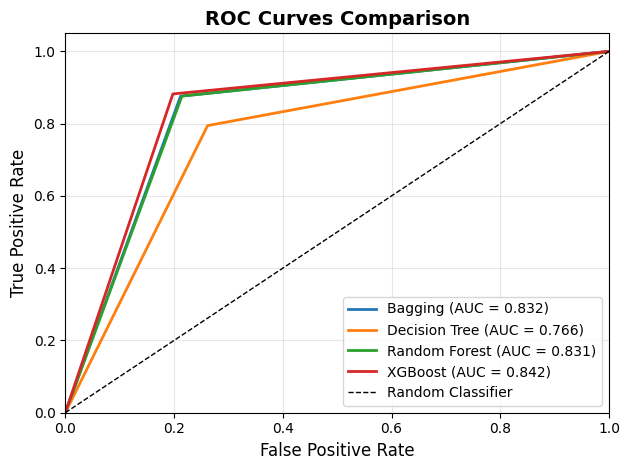

In [37]:
import matplotlib.pyplot as plt
# Plot ROC curves
plt.plot(fpr_bag, tpr_bag, label=f'Bagging (AUC = {auc_bag:.3f})', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', linewidth=2)

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

# Customize plot
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()